**WATER POTABILITY PREDICTION**

**Problem Statement -**
To predict whether a water sample is potable (safe for drinking) or not, using its quality parameters. This solves real-world issues around water safety, supporting robust public health and environment decisions.

**OBJECTIVES-**

**1.Explore the Dataset-**
 The dataset, water_potability.csv, contains 3,276 rows (samples) and 10 columns, with the following features: pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes, Turbidity .


**Potability:** Target label (0=Not potable, 1=Potable)


Missing values are present in several columns (notably pH, Sulfate, Trihalomethanes), requiring attention during preprocessing.

**2.Exploratory Data Analysis (EDA)-** Analyze distributions/summary statistics for each feature, visualized using histograms and box plots.


Identify dataset class imbalance: 61% not potable, 39% potable.


Inspect missing data distribution and potential outliers.


Calculate correlations between features and potability; all features are numeric.

**3.Preprocessing Steps-**
Impute all missing values: Use mean imputation for pH, Sulfate, and Trihalomethanes (or choose more advanced imputation for larger gaps).

Log-transform skewed features: Recommended for Solids, Trihalomethanes.

Feature Scaling: Standardize all features using StandardScaler.

Class Balancing: Use SMOTE or similar (oversample) for balanced predictions.

Split Data: Stratified train/test split (typically 80/20).

**4.Model Building-**
Test multiple machine learning algorithms:Random Forest, XGBoost, SVC, Decision Tree, KNN.


Tune hyperparameters for the best performing models (e.g., GridSearchCV for Random Forest).


Use K-Fold Cross-Validation (StratifiedKFold) for robust model evaluation.

**5.Evaluate and Compare Model Performance-** Use metrics: F1-score, Precision, Recall, Accuracy, ROC AUC.

Present Confusion Matrix, ROC curve, and Feature Importance.

Compare models; Random Forest commonly performs best for this dataset, but show results for all tested models.

**TABLE OF CONTENTS :**

Import Libraries


Load the Dataset

Initial Data Analysis

Missing Value Imputation

Satistical Description

Class Distribution Check

Visualize Feature Distributions & Outliers

Correlation Analysis

Feature and Target Split

Feature Scaling

Class Imbalance Handling

Train-Test Split

Model Selection

Model Training with Cross-Validation

Hyperparameter Tuning

Final Model Evaluation

Feature Importance Analysis

**LET'S START -**

**Step 1- Data Exploration and Preprocessing**

**Step-1.1- Import Libraries**

**Why** -
When you work in Jupyter Notebook,Python by itself does not know how to perform every task. It only understands the basic language commands. But for specific tasks like data analysis, machine learning, plotting, or reading Excel files, you need extra functionality that is not built into Python’s core.

In [1]:
# Libraries
import pandas as pd                #for handling data
import numpy as np                 # for mathematical operations
import matplotlib.pyplot as plt    # for data visulizations
import seaborn as sns              




**Step-1.2-Load Datasets**

Purpose: Bring the dataset into Jupyter so we can analyze it.

**df.head() -**


Purpose: Get a quick glimpse of the data structure and sample values.

**df.info() -**

Purpose: Check column names, data types, number of non-missing values, and memory usage.

**df.isnull().sum()-**

Purpose: Identify which columns have missing (null) values and how many, so we know where cleaning is needed.

In [2]:

# Load your data
df = pd.read_csv("C:\\Users\MAMATA SARKAR\\Desktop\\AI_Retraining\water_potability.csv")
print(df.head())           # Check first 5 rows
print(df.info())           # Info on columns and missing values
print(df.isnull().sum())   # Count missing values for each column




         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

**Step-1.3 -Filling missing numeric data with mean -**

**ph, Sulfate, and Trihalomethanes — all three are continuous and approximately normally distributed.
Therefore, mean imputation is the most logical choice here,
and during model training, it introduces very little bias or error.**

In [3]:
# Impute missing values with column means
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)



C:\Users\MAMATA SARKAR\AppData\Local\Temp\ipykernel_29352\2987754777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\MAMATA SARKAR\AppData\Local\Temp\ipykernel_29352\2987754777.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

**Step-1.4-  print(df.describe()) to get a quick statistical overview of your data-**

In [4]:



# Quick statistical look
print(df.describe())



                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881     0.780382     0.487849  


**Step-1.5- Class balance is needed to ensure the model doesn’t become biased toward the majority class-**

In [5]:

# Check class balance
print(df['Potability'].value_counts())



Potability
0    1998
1    1278
Name: count, dtype: int64


**Step-1.6- We do this step to visualize the distribution and possible outliers in numeric columns, so the data is clean and ready for modeling-**

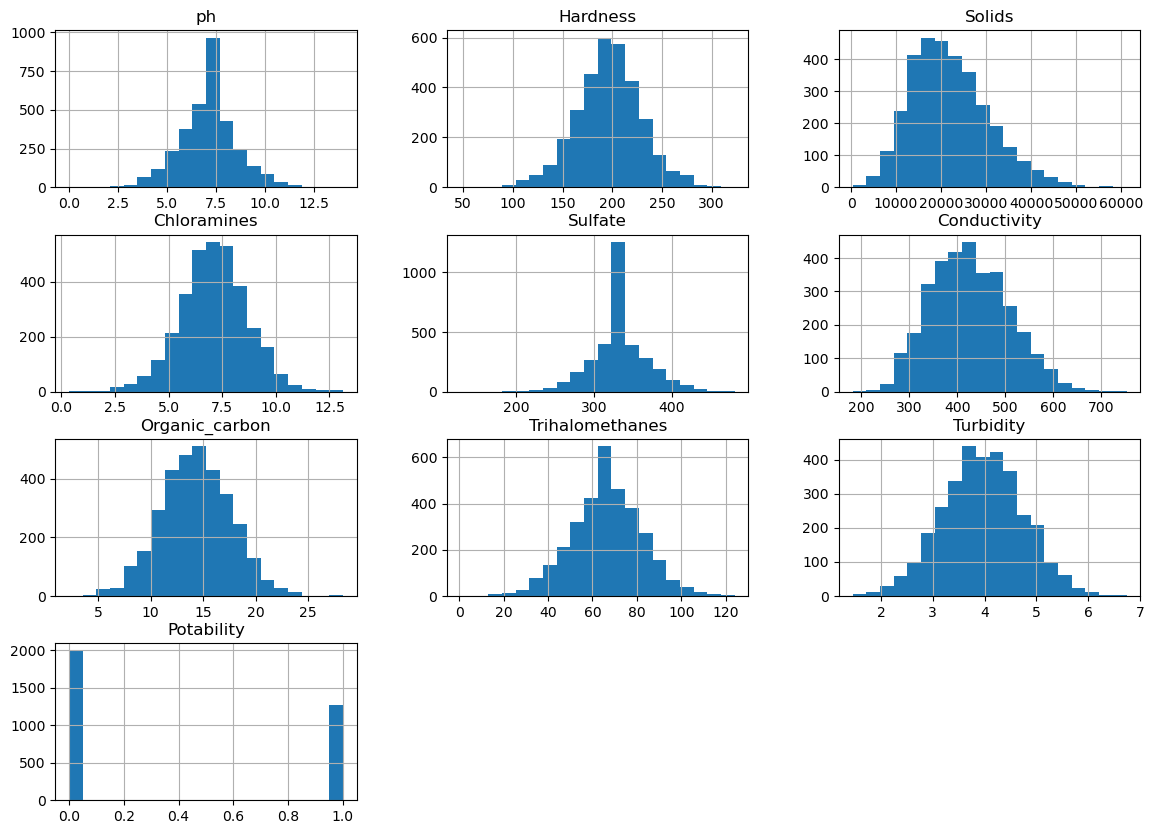

In [6]:



# Visualize numeric distribution and outliers
df.hist(bins=20, figsize=(14,10))
plt.show()



**Step-1.7- Boxplot used to visualize the distribution and detect outliers of all numeric features in the dataset-**

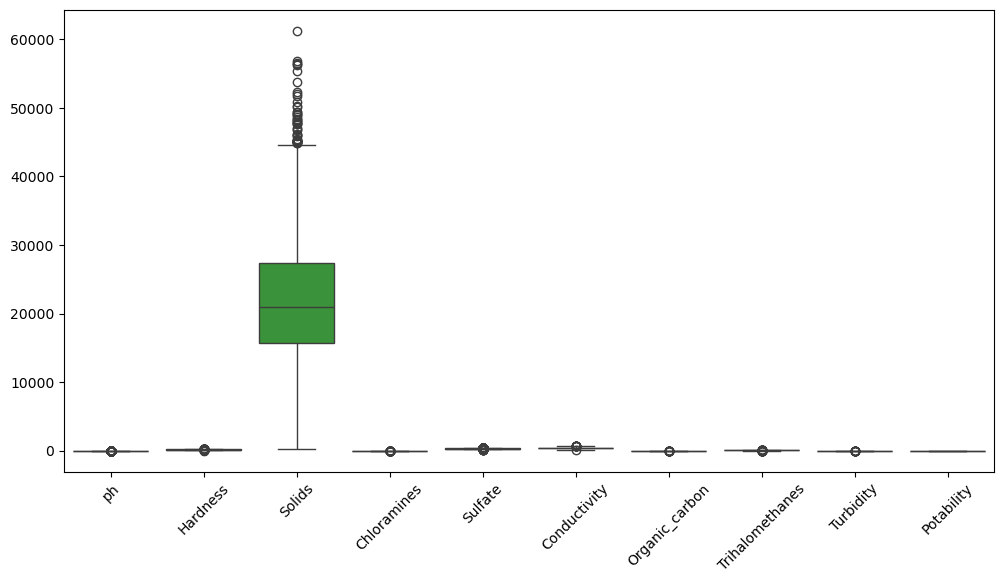

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

**Step-2 (Feature Engineering)**

**Step-2.1 - Log Transformation**

**This code is applied to reduce data skewness and the influence of outliers by using the numerically stable \log(1+x) transformation, thereby improving machine learning model performance.**

In [8]:
 #(Optional) Transformation for highly skewed features
# For example: log-transform 'Solids'
df['Solids'] = np.log1p(df['Solids'])
df['Trihalomethanes'] = np.log1p(df['Trihalomethanes'])

**Step-2.2 - Purpose: To understand relationships between features and identify which variables are highly correlated.**

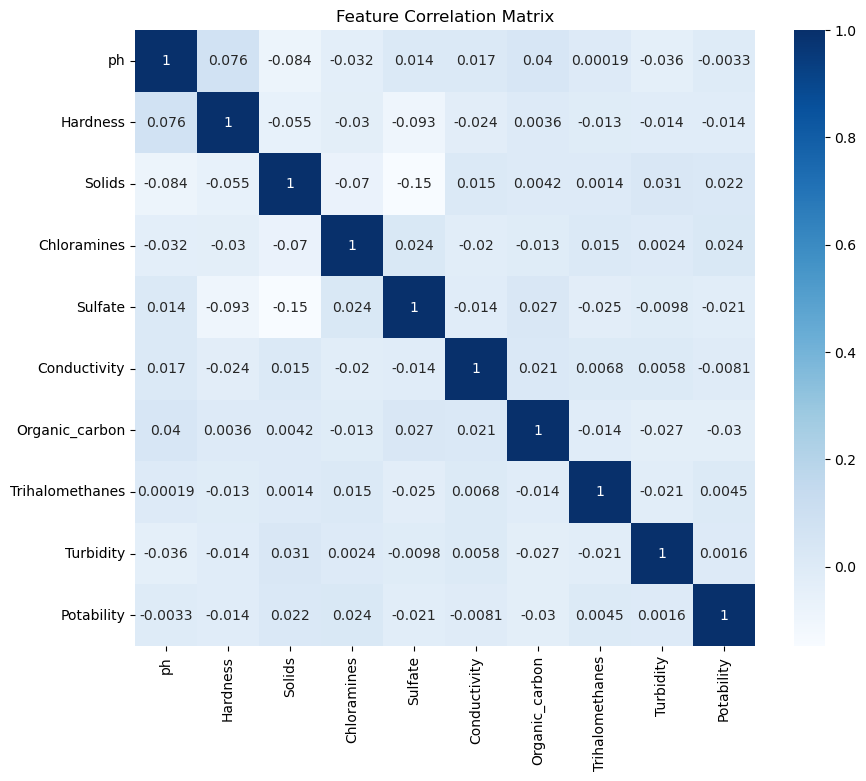

In [9]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Matrix")
plt.show()



**Step-3 ( Handling Class imbalance)**

**StandardScaler**

**To classify water samples as potable (safe to drink) or not potable based on nine physico-chemical characteristics.**

**Smote (Handling Class imbalance with smote)**

**To balance the imbalanced dataset by creating synthetic samples for the minority class (Potability 1), thus preventing the model from being biased towards the majority class.**

**Step-3.1- Import**

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



**Step-3.2 - Split**

**To strictly separate the input variables {X} used for prediction (the water characteristics) from the target variable {y} the model must learn to predict (Potability)-**

In [11]:


# Split features/target
X = df.drop('Potability', axis=1)
y = df['Potability']



**Step-3.3**

**To strictly standardize the wildly different feature scales (e.g., Solids in thousands vs. pH in single digits) so no variable dominates distance-based models and all features contribute equally-**

In [14]:


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



**Step-3.4- To resolve the severe class imbalance by creating synthetic samples of the minority class (Potability 1), thus ensuring the model trains equally on both classes-**

In [15]:


# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Check new class balance
print(pd.Series(y_res).value_counts())

Potability
0    1998
1    1998
Name: count, dtype: int64


**Step-4 ( Model selection and training)**

**This step not only helps the model learn (Train) but also provides an honest assessment of how well it will perform (Test) in a real-world scenario.**

**cross_val_score: Used to get a reliable average of the model's performance.**


**StratifiedKFold: Used to ensure that the model's evaluation maintains the correct class ratio (50:50 balance) within every test/validation fold.**

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)




**Step-4.1- To compare diverse modeling approaches (Distance, Tree, and Ensemble Boosting) against the classification problem to robustly select the best algorithm for predicting water potability.**

In [21]:


# Model definitions
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb



**Step-4.2- This code was used to initialize and define a dictionary of five diverse classification models (SVC, Random Forest, KNN, Decision Tree, and XGBoost) for comparison, ensuring a robust selection of the best algorithm for the water potability task.**

In [22]:



models = {
    'SVC': SVC(probability=True, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}


**Step-4.3- This code was used to reliably select the best-performing model (Random Forest) among various candidates and to obtain its stable average F1-score.**

In [23]:


results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate F1-score for each model
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    print(f"{name} F1-score: {np.mean(score):.3f}")
    results[name] = score

SVC F1-score: 0.663
RandomForest F1-score: 0.715
KNN F1-score: 0.673
DecisionTree F1-score: 0.637


C:\Users\MAMATA SARKAR\Documents\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\MAMATA SARKAR\Documents\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\MAMATA SARKAR\Documents\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\MAMATA SARKAR\Documents\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

XGBoost F1-score: 0.683


C:\Users\MAMATA SARKAR\Documents\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:24:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Step-5 ( Hyperparameter Tuning)**


**It was used to automatically optimize the internal settings of the RandomForest model specifically for your dataset, allowing the model to achieve its best possible performance.**

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
grid.fit(X_train, y_train)
print('Best Parameters (Random Forest):', grid.best_params_)

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


**Step-6 ( Model Evaluation)**

**Step-6.1- These metrics were imported to provide a complete, robust, and detailed final performance evaluation of the optimized model on the unseen test data.**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report



**Step-6.2- This below code was run to get the honest, final performance assessment of the optimized Random Forest model on the unseen test data, validating the success of the entire project pipeline.**

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       400
           1       0.74      0.72      0.73       400

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

Confusion Matrix: [[297 103]
 [112 288]]
AUC: 0.80089375


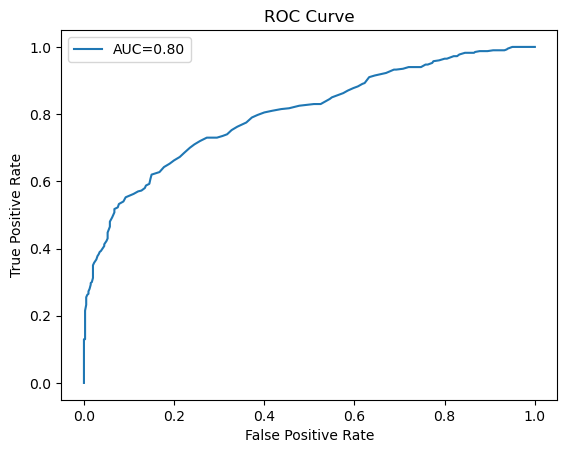

In [27]:


# Final evaluation on best random forest (example)
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('Confusion Matrix:'
 ,confusion_matrix(y_test, y_pred))
print('AUC:', roc_auc_score(y_test, y_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='best')
plt.show()

**Step-7 (Feature Importance (Tree-based models))**

**Below the code was run to determine the relative influence of each water quality parameter on the model's prediction, providing actionable insight into which features are most critical for potability.**

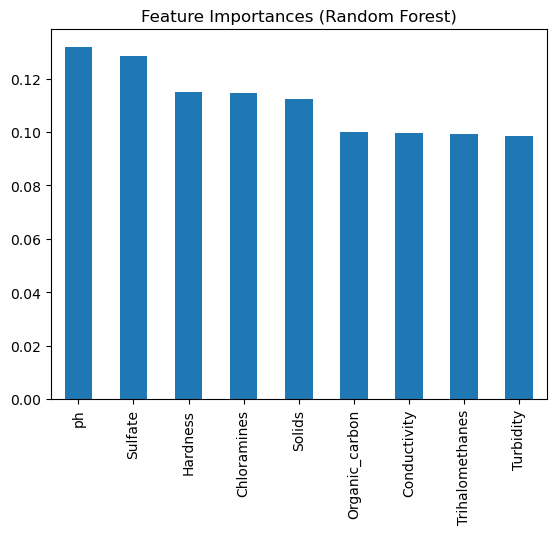

ph                 0.131832
Sulfate            0.128394
Hardness           0.115175
Chloramines        0.114668
Solids             0.112306
Organic_carbon     0.100171
Conductivity       0.099594
Trihalomethanes    0.099426
Turbidity          0.098434
dtype: float64


In [28]:
importances = best_rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.show()
print(feat_imp)